## Build Weaver Network

In [2]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

In [16]:
G = nx.Graph()

with open('soc-dolphins.mtx', 'r') as f:
    lines = f.readlines()
    # print((lines)[194])
    # line = lines.split('62 62 159')[1]
    # print(lines)
    for i in range(36, 195):
        first_animal = lines[i].split(' ')[0]
        second_animal = lines[i].split(' ')[1].split('\n')[0]
        
        G.add_edge(first_animal, second_animal, weight=1)
        # print(lines)
        # break
 

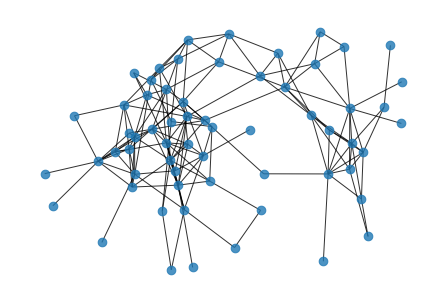

In [113]:
nx.draw(G, pos, with_labels = False, node_size = 75, alpha = 0.8)
plt.savefig(f"network.jpg")

In [69]:
print('nx.info:',nx.info(G))  # 返回圖的基本資訊
print('nx.degree:',nx.degree(G))  # 返回圖中各頂點的度
print('nx.density:',nx.degree_histogram(G))  # 返回圖中度的分佈

nx.info: Graph with 62 nodes and 159 edges
nx.degree: [('11', 5), ('1', 6), ('15', 12), ('16', 7), ('41', 8), ('43', 6), ('48', 6), ('18', 9), ('2', 8), ('20', 4), ('27', 3), ('28', 5), ('29', 5), ('37', 7), ('42', 5), ('55', 7), ('3', 4), ('45', 4), ('62', 3), ('9', 6), ('4', 3), ('60', 5), ('52', 10), ('5', 1), ('10', 7), ('6', 4), ('14', 8), ('57', 2), ('58', 9), ('7', 6), ('8', 5), ('31', 5), ('21', 9), ('38', 11), ('46', 11), ('33', 3), ('30', 9), ('12', 1), ('34', 10), ('13', 1), ('17', 6), ('25', 6), ('35', 5), ('39', 8), ('44', 7), ('51', 7), ('53', 4), ('19', 7), ('56', 2), ('23', 1), ('26', 3), ('32', 1), ('22', 6), ('24', 3), ('36', 1), ('61', 1), ('50', 2), ('40', 2), ('59', 1), ('47', 2), ('54', 2), ('49', 1)]
nx.density: [0, 9, 6, 6, 5, 8, 8, 7, 4, 4, 2, 2, 1]


/var/folders/4p/slhgkvrd09356dhy7fljlz280000gn/T/ipykernel_32233/2503315560.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('nx.info:',nx.info(G))  # 返回圖的基本資訊


## Small World Phenomenon 

In [19]:
# -------- Average Shortest Path Length ----------
a = nx.average_shortest_path_length(G)
print(a)

3.3569539925965097


## Transitivity

In [20]:
transitivity = nx.transitivity(G)
print(transitivity)

0.3087757313109426


## Degree Distribution

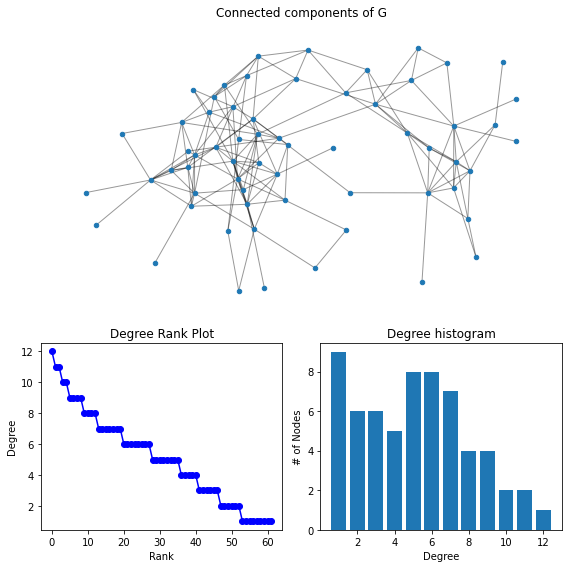

<Figure size 432x288 with 0 Axes>

In [110]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()
plt.savefig(f"degree_distribution.jpg")

## Degree Correlations

In [22]:
r = nx.degree_pearson_correlation_coefficient(G)
print(r)

-0.04359402821531298


## Community Detection (Louvain Algorithm)

In [23]:
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [25]:
partition = community_louvain.best_partition(G)

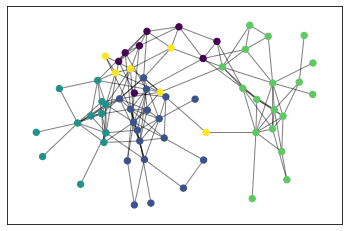

In [111]:
# draw the graph
# pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()), label = True )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [112]:
community = []
for i in range(5):
    temp = []
    for (k,v) in partition.items():
        if i == v:
            temp.append(k)
    community.append(temp)
    print(f'community_{i}:\n', temp)


community_0:
 ['11', '1', '43', '48', '20', '3', '8', '31']
community_1:
 ['15', '41', '45', '62', '21', '38', '34', '13', '17', '35', '39', '44', '51', '53', '50', '59', '47', '54']
community_2:
 ['16', '52', '5', '46', '30', '12', '25', '19', '56', '22', '24', '36']
community_3:
 ['18', '2', '27', '28', '42', '55', '10', '6', '14', '57', '58', '7', '33', '23', '26', '32', '61', '49']
community_4:
 ['29', '37', '9', '4', '60', '40']


## Centrality

### 1. Degree Centrality (local)

In [28]:
c = nx.degree_centrality(G)


In [29]:
degree_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}


{'15': Text(-0.31073284649120103, -0.02003132854882406, '15'),
 '38': Text(-0.2890129904777672, -0.08385881544150833, '38'),
 '46': Text(-0.4877864760857331, 0.0021291357645029886, '46'),
 '52': Text(-0.6911638764943733, -0.08757922390106651, '52'),
 '34': Text(-0.24440079326831782, -0.17465462276775787, '34'),
 '18': Text(0.7106282549712186, 0.10569263720545291, '18'),
 '58': Text(0.5899589407891975, -0.13367848930375112, '58'),
 '21': Text(-0.21718778414878562, 0.1310299584940594, '21'),
 '30': Text(-0.48750087270662495, -0.13491645360538015, '30'),
 '41': Text(-0.1965955818293068, 0.0762343595987853, '41')}

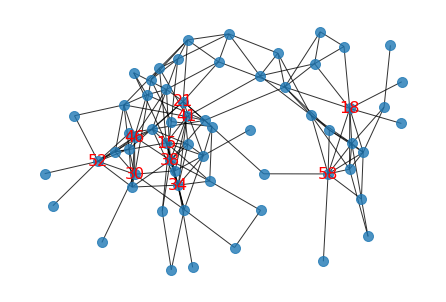

In [97]:
pos=nx.spring_layout(G)
labels = {}    
num = 0
for node in degree_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')
# plt.savefig(f"network_test.jpg")

### 2. Betweenness Centralization 

In [95]:
bc = nx.betweenness_centrality(G, normalized= True)
between_c = {k: v for k, v in sorted(bc.items(), key=lambda item: item[1], reverse=True)}

{'37': Text(-0.09808965736058319, 0.062024604401229845, '37'),
 '2': Text(0.3485195292132218, 0.1839226593860054, '2'),
 '41': Text(-0.1965955818293068, 0.0762343595987853, '41'),
 '38': Text(-0.2890129904777672, -0.08385881544150833, '38'),
 '8': Text(0.21059726943613966, 0.22467438274845475, '8'),
 '18': Text(0.7106282549712186, 0.10569263720545291, '18'),
 '21': Text(-0.21718778414878562, 0.1310299584940594, '21'),
 '55': Text(0.4957979350017803, 0.08056414996728553, '55'),
 '52': Text(-0.6911638764943733, -0.08757922390106651, '52'),
 '58': Text(0.5899589407891975, -0.13367848930375112, '58')}

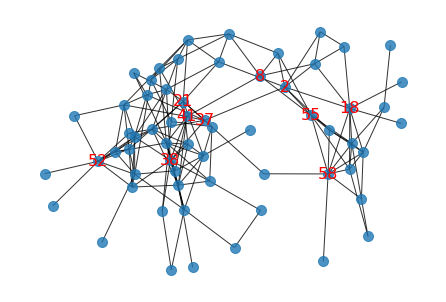

In [98]:

labels = {}    
num = 0
for node in between_c.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 3. Closeness Centralizatioin

In [99]:
c = nx.closeness_centrality(G)

In [100]:
closeness_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'37': Text(-0.09808965736058319, 0.062024604401229845, '37'),
 '41': Text(-0.1965955818293068, 0.0762343595987853, '41'),
 '38': Text(-0.2890129904777672, -0.08385881544150833, '38'),
 '21': Text(-0.21718778414878562, 0.1310299584940594, '21'),
 '15': Text(-0.31073284649120103, -0.02003132854882406, '15'),
 '2': Text(0.3485195292132218, 0.1839226593860054, '2'),
 '29': Text(-0.019989979355032057, 0.2759845847089199, '29'),
 '8': Text(0.21059726943613966, 0.22467438274845475, '8'),
 '34': Text(-0.24440079326831782, -0.17465462276775787, '34'),
 '9': Text(-0.3106487617861053, 0.17514310477106546, '9')}

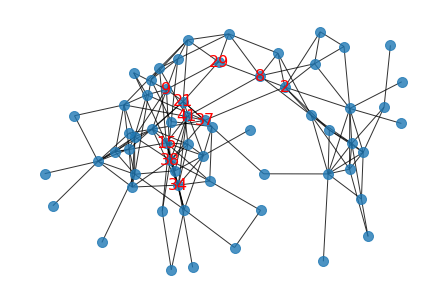

In [105]:
labels = {}    
num = 0
for node in closeness_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 4. Eigenvector Centrality

In [102]:
c = nx.eigenvector_centrality(G)

In [103]:
eigenvector_centrality = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'37': Text(-0.09808965736058319, 0.062024604401229845, '37'),
 '41': Text(-0.1965955818293068, 0.0762343595987853, '41'),
 '38': Text(-0.2890129904777672, -0.08385881544150833, '38'),
 '21': Text(-0.21718778414878562, 0.1310299584940594, '21'),
 '15': Text(-0.31073284649120103, -0.02003132854882406, '15'),
 '2': Text(0.3485195292132218, 0.1839226593860054, '2'),
 '29': Text(-0.019989979355032057, 0.2759845847089199, '29'),
 '8': Text(0.21059726943613966, 0.22467438274845475, '8'),
 '34': Text(-0.24440079326831782, -0.17465462276775787, '34'),
 '9': Text(-0.3106487617861053, 0.17514310477106546, '9')}

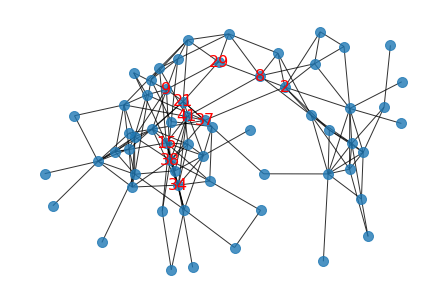

In [104]:
labels = {}    
num = 0
for node in closeness_centrality.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')

### 5. Page Rank

In [106]:
c = nx.pagerank(G)

In [107]:
page_rank = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}

{'15': Text(-0.31073284649120103, -0.02003132854882406, '15'),
 '18': Text(0.7106282549712186, 0.10569263720545291, '18'),
 '52': Text(-0.6911638764943733, -0.08757922390106651, '52'),
 '58': Text(0.5899589407891975, -0.13367848930375112, '58'),
 '38': Text(-0.2890129904777672, -0.08385881544150833, '38'),
 '46': Text(-0.4877864760857331, 0.0021291357645029886, '46'),
 '34': Text(-0.24440079326831782, -0.17465462276775787, '34'),
 '30': Text(-0.48750087270662495, -0.13491645360538015, '30'),
 '14': Text(0.7219333614215134, -0.022405180821290994, '14'),
 '2': Text(0.3485195292132218, 0.1839226593860054, '2')}

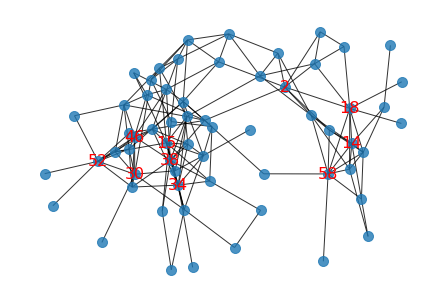

In [108]:
labels = {}    
num = 0
for node in page_rank.keys():
    labels[node] = node
    num += 1
    if num == 10:
        break
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(G, pos,  with_labels=False, node_size = 100, alpha = 0.8)
#Now only add labels to the nodes you require (the hubs in my case)
nx.draw_networkx_labels(G, pos , labels, font_size=16, font_color='r')